In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [3]:
bean_df = pd.read_csv('./Dry_Bean_Dataset.csv')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
print(f'shape of the datset: {bean_df.shape}')
print(f'Features:\n {bean_df.nunique()}')

shape of the datset: (13611, 17)
Features:
 Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64


In [5]:
train, val, test = np.split(bean_df.sample(frac=1), [int(0.8*len(bean_df)), int(0.9*len(bean_df))])
val

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
11663,31286,664.966,241.206913,166.867051,1.445504,0.722089,31688,199.586003,0.704005,0.987314,0.889121,0.827447,0.007710,0.002229,0.684669,0.989691,DERMASON
8470,43346,787.501,293.129879,189.899700,1.543604,0.761781,43954,234.925182,0.789401,0.986167,0.878328,0.801437,0.006763,0.001721,0.642302,0.991459,SIRA
3741,186765,1648.501,635.873591,377.526881,1.684313,0.804676,188680,487.643911,0.808045,0.989851,0.863628,0.766888,0.003405,0.000726,0.588117,0.990574,BOMBAY
1309,41091,738.571,256.801472,203.979979,1.258954,0.607513,41504,228.732783,0.753535,0.990049,0.946612,0.890699,0.006250,0.002426,0.793344,0.998784,SEKER
2816,71797,1065.587,367.029794,250.099147,1.467537,0.731898,73023,302.348771,0.695357,0.983211,0.794581,0.823772,0.005112,0.001452,0.678600,0.995871,BARBUNYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,79992,1119.069,402.486441,253.828126,1.585665,0.776067,81244,319.137866,0.715108,0.984590,0.802680,0.792916,0.005032,0.001227,0.628715,0.996932,BARBUNYA
2701,69824,1055.572,389.048708,229.112799,1.698066,0.808202,70943,298.165521,0.688396,0.984227,0.787479,0.766396,0.005572,0.001186,0.587363,0.997382,BARBUNYA
1790,45656,771.851,271.828264,213.935092,1.270611,0.616924,45988,241.103763,0.755244,0.992781,0.963032,0.886971,0.005954,0.002273,0.786717,0.999612,SEKER
12162,33203,682.158,260.097138,162.896963,1.596697,0.779588,33537,205.609758,0.789533,0.990041,0.896638,0.790511,0.007834,0.001887,0.624908,0.997789,DERMASON


In [6]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('Class')
  labels = pd.get_dummies(labels)
  df = {key: value.values[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [7]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val)
test_ds = df_to_dataset(test)

In [8]:
def get_normalization_layer(name, dataset):
  normalizer = tf.keras.layers.Normalization(axis=None)
  feature_ds = dataset.map(lambda x, y: x[name])
  normalizer.adapt(feature_ds)
  return normalizer

In [9]:
all_inputs, encoded_features, cols = [], [], []
for i in bean_df.columns:
    cols.append(i)
cols.remove('Class')
for header in cols:
  col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_col = normalization_layer(col)
  all_inputs.append(col)
  encoded_features.append(encoded_col)

In [11]:
num_classes = 7
Adam = tf.keras.optimizers.Adam(learning_rate=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
x = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
model = tf.keras.Model(all_inputs,outputs)
model.compile(optimizer=Adam, loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [13]:
history = model.fit(train_ds,validation_data=val_ds,epochs=100, callbacks=[callback])

Epoch 1/100


c:\Users\keert\anaconda3\lib\site-packages\keras\engine\functional.py:631: UserWarning: Input dict contained keys ['Class'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


341/341 [==============================] - 3s 6ms/step - loss: 0.6720 - accuracy: 0.7449 - val_loss: 0.2488 - val_accuracy: 0.9148
Epoch 2/100
341/341 [==============================] - 2s 5ms/step - loss: 0.2328 - accuracy: 0.9183 - val_loss: 0.2171 - val_accuracy: 0.9221
Epoch 3/100
341/341 [==============================] - 2s 5ms/step - loss: 0.2140 - accuracy: 0.9229 - val_loss: 0.2264 - val_accuracy: 0.9155
Epoch 4/100
341/341 [==============================] - 2s 4ms/step - loss: 0.2101 - accuracy: 0.9240 - val_loss: 0.1985 - val_accuracy: 0.9324
Epoch 5/100
341/341 [==============================] - 2s 5ms/step - loss: 0.2018 - accuracy: 0.9275 - val_loss: 0.2180 - val_accuracy: 0.9243
Epoch 6/100
341/341 [==============================] - 2s 4ms/step - loss: 0.1993 - accuracy: 0.9280 - val_loss: 0.2056 - val_accuracy: 0.9265
Epoch 7/100
341/341 [==============================] - 2s 5ms/step - loss: 0.1975 - accuracy: 0.9279 - val_loss: 0.2000 - val_accuracy: 0.9287
Epoch 8/100

In [14]:
import matplotlib.pyplot as plt
history = history.history

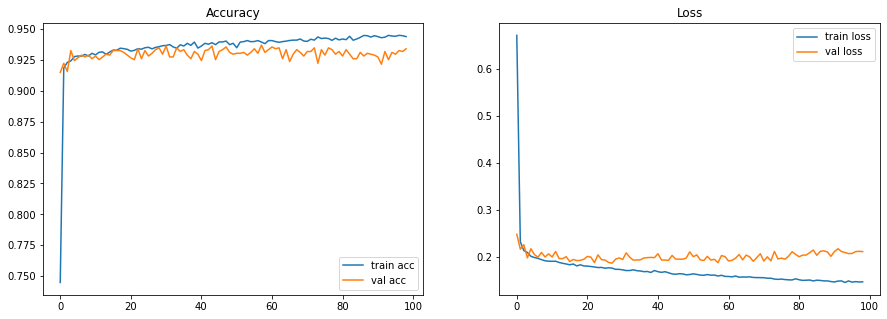

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train acc")
plt.plot(history["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train loss")
plt.plot(history["val_loss"],label="val loss")
plt.legend()

plt.show()

In [17]:
loss ,accuracy = model.evaluate(test_ds)

43/43 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9295


In [18]:
print("test loss :",loss)
print("test accuracy :",accuracy)

test loss : 0.22804339230060577
test accuracy : 0.9295154213905334
